In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [ ]:
df= pd.read_csv("Fraud_check.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
df2=df.copy()

In [ ]:
df2.insert(6,'tax_class'," ")

for i in range(0,len(df2['Taxable.Income']),1):
    if df2['Taxable.Income'].iloc[i]<=30000:
        df2['tax_class'].iloc[i]='Risky'
    else:
        df2['tax_class'].iloc[i]='Good'

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df2.sample(4)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_class
457,NO,Married,11804,36055,24,YES,Risky
293,NO,Divorced,31645,43899,21,YES,Good
219,YES,Divorced,20604,26814,9,NO,Risky
5,NO,Divorced,33329,116382,0,NO,Good


In [ ]:
df2.tax_class.value_counts()

Good     476
Risky    124
Name: tax_class, dtype: int64

In [ ]:
df2.drop(['Taxable.Income'],axis=1,inplace=True)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df2['Undergrad']= label_encoder.fit_transform(df2['Undergrad'])
df2['Marital.Status']= label_encoder.fit_transform(df2['Marital.Status'])
df2['Urban']= label_encoder.fit_transform(df2['Urban'])
df2['tax_class']= label_encoder.fit_transform(df2['tax_class'])

In [ ]:
df2.iloc[:,2:4]=StandardScaler().fit_transform(df2.iloc[:,2:4])

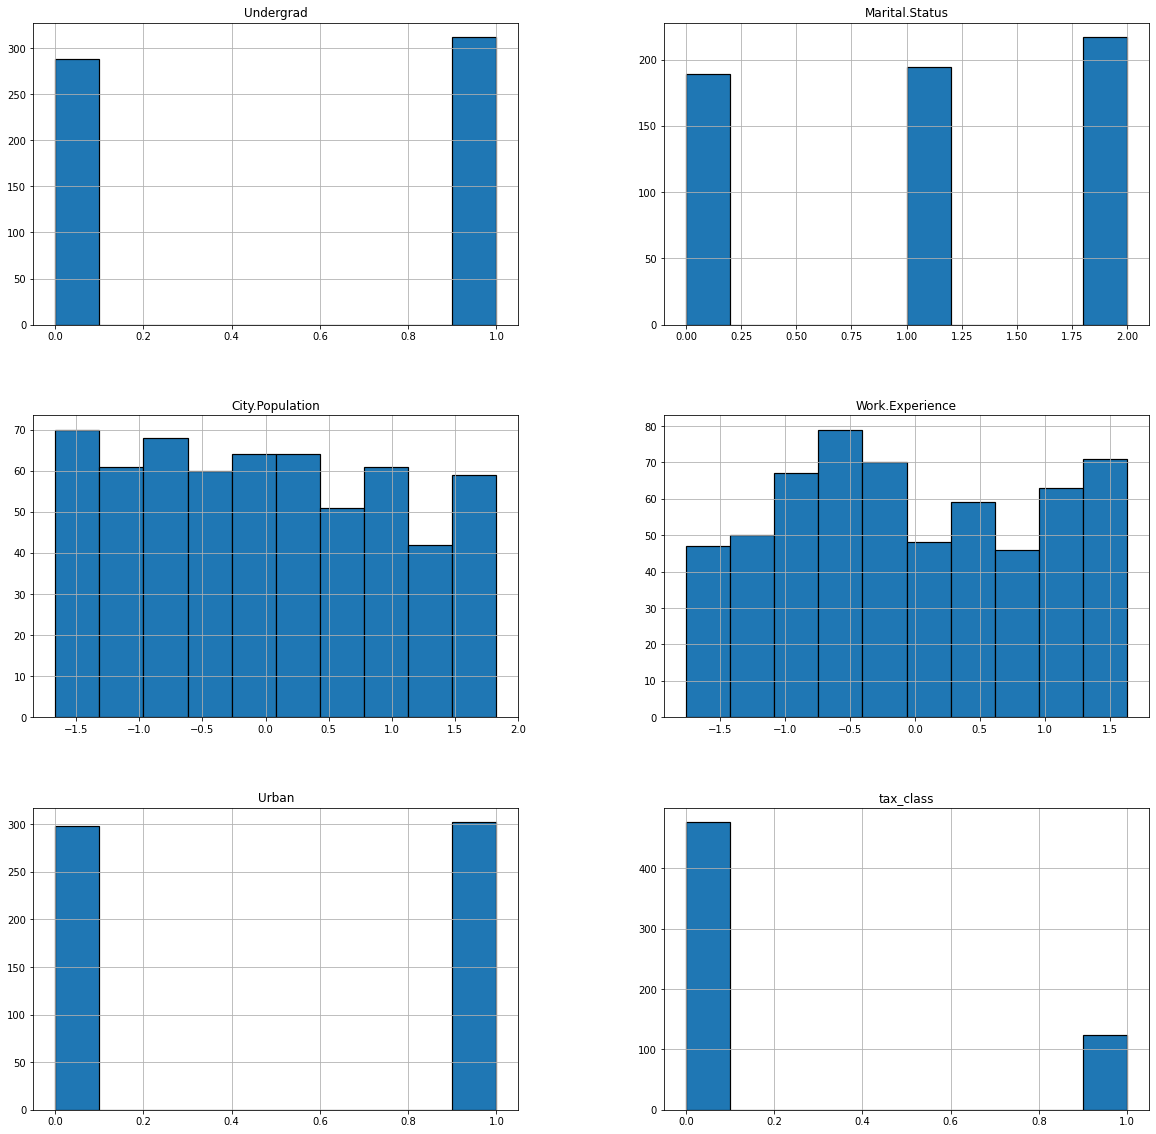

In [ ]:
df2.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

<AxesSubplot:>

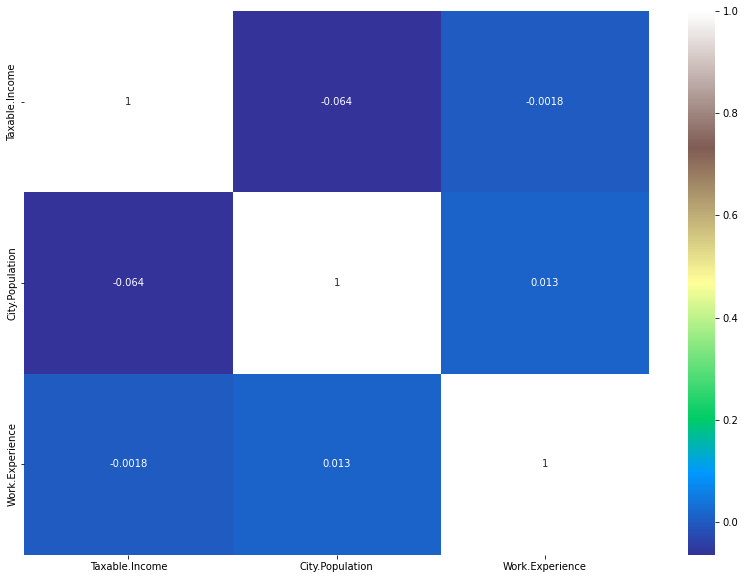

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap='terrain')

In [ ]:
df3=df2.copy()

In [ ]:
#Defining x and y 
x=df3.iloc[:,0:-1]
y=df3['tax_class']

Splitting data into Train and Test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [ ]:
#Model Building
model=RandomForestClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(np.mean(y_test==pred))

0.7416666666666667


In [ ]:
model=RandomForestClassifier(criterion='gini',max_depth= 19,max_leaf_nodes=19,n_estimators=1000)
model.fit(x,y)
pred=model.predict(x)
print(np.mean(y==pred))

0.795


In [ ]:
model=RandomForestClassifier(criterion='gini',max_depth= 19,max_leaf_nodes=19,n_estimators=1000)
model.fit(x_train,y_train)
pred=model.predict(x_train)
print(np.mean(y_train==pred))

0.7979166666666667


In [ ]:
#Applying KFOLD
kfold=KFold(n_splits=10)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.7933333333333332


In [ ]:
#Bagging
model=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
from sklearn.ensemble import BaggingClassifier
model1=BaggingClassifier(base_estimator=model)
results=cross_val_score(model1,x,y,cv=kfold)
print(results.mean())

0.7933333333333332


In [ ]:
#Boosting
from sklearn.ensemble import AdaBoostClassifier
model1=AdaBoostClassifier(base_estimator=model)
results=cross_val_score(model1,x,y,cv=kfold)
print(results.mean())

0.7466666666666667
